In [ ]:
img = np.fft.fftshift(image) #just to center our actual image
image = np.fft.fft2(image) #the inside paranthesis image is our actual image
plt.imshow(np.fft.fftshift(image, real), vmax = 500, vmin = -500)
plt.colorbar()

In [66]:
C = 2.99e8 

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
import ugradio 
import csv
import glob
import pickle
from scipy.optimize import curve_fit
from astropy.time import Time

In [5]:
%pwd

'/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/Undergraduate-Radio-Astronomy-Lab/Lab 3'

In [68]:
data_files = sorted(glob.glob('/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/Undergraduate-Radio-Astronomy-Lab/Lab3/*.pkl'))
data_files 

['/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/Undergraduate-Radio-Astronomy-Lab/Lab3/dat1.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/Undergraduate-Radio-Astronomy-Lab/Lab3/dat10.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/Undergraduate-Radio-Astronomy-Lab/Lab3/dat100.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/Undergraduate-Radio-Astronomy-Lab/Lab3/dat1000.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/Undergraduate-Radio-Astronomy-Lab/Lab3/dat10000.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/Undergraduate-Radio-Astronomy-Lab/Lab3/dat10001.pkl',
 '/Users/orkidehkhoshsorour/Documents/Documents/School/Berkeley/Spring 2023/Radio Lab/Undergraduate-Radio-Astronomy-Lab/Lab3/dat10002.pkl',
 '/Users/orkidehkhoshsorour/Do

In [69]:
#raw_data = [np.load(f'sun_data/sun_{i}.pkl', allow_pickle=True).tolist() for i in range(21000)]
raw_data =[]
for i in data_files:
    data = np.load(i,allow_pickle=True)
    raw_data = np.append(raw_data,data)
raw_data


array([{'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 452268, 'time': 1678202384.6190825}           ,
       {'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 452286, 'time': 1678202411.6679242}           ,
       {'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 452469, 'time': 1678202686.6473339}           ,
       ...,
       {'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 472941, 'time': 1678233318.7410314}           ,
       {'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 472943, 'time': 1678233321.7337263}           ,
       {'corr01': array([6.125+0.j, 0.   +0.j, 0.   +0.j, ..., 0.   +0.j, 0.   +0.j,
              0.   +0.j]), 'acc_cnt': 476673, 't

In [70]:
raw_data = sorted(raw_data, key=lambda x: x['time'])

In [71]:
vis = np.array([d['corr01'] for d in raw_data]) #corr1 is data = power spectrum 
fullsundata = vis
times = np.array([d['time'] for d in raw_data]) #time is time

acc_cnt = np.array([d['acc_cnt'] for d in raw_data]) #acc_cnt is the number of times for counting or saving
LO = 8.75e9 + 1.54e9
freqs = np.linspace(0, 250e6, 1024, endpoint=False) + LO

In [61]:
location = ('62.762919d','37.873199d')
t = astropy.time.Time(times, format = 'unix', location = location)
jds = t.jd
lsts = ugradio.timing.lst(jds)
diffjds = (jds[-1]-jds[0])/len(jds)
siderialdayinseconds = 23.9344696*60*60
diffjds_seconds = siderialdayinseconds* diffjds
print(f'Average time difference, {diffjds_seconds}s')

print(jds.shape, lsts.shape)
jds.shape

Average time difference, 3.0714373921344063s
(11862,) (11862,)


(11862,)

In [ ]:
#hour angle
sun_radecs = [ugradio.coord.sunpos(jds[i]) for i in range(len(jds))]
sun_radecs = np.array(sun_radecs)

sun_lsts = ugradio.timing.lst(jds)
sun_lsts = np.array(sun_lsts)

ras = np.deg2rad(sun_radecs[:,0])
decs = np.deg2rad(sun_radecs[:,1])
has = sun_lsts - ras

print(f'RAs, {ras}')
print(f'LSTs, {sun_lsts}')
print(f'HAs, {has}')

In [43]:
L = np.deg2rad(37.873199) # terrestrial latitude
lamb = 0.025 # wavelength, meters

In [72]:
vis -= np.mean(vis, axis=0, keepdims=True)
# print(len(vis))
plt.plot(np.angle(vis[:,800]))
plt.xlim(0,200)


(0.0, 200.0)

<IPython.core.display.Javascript object>


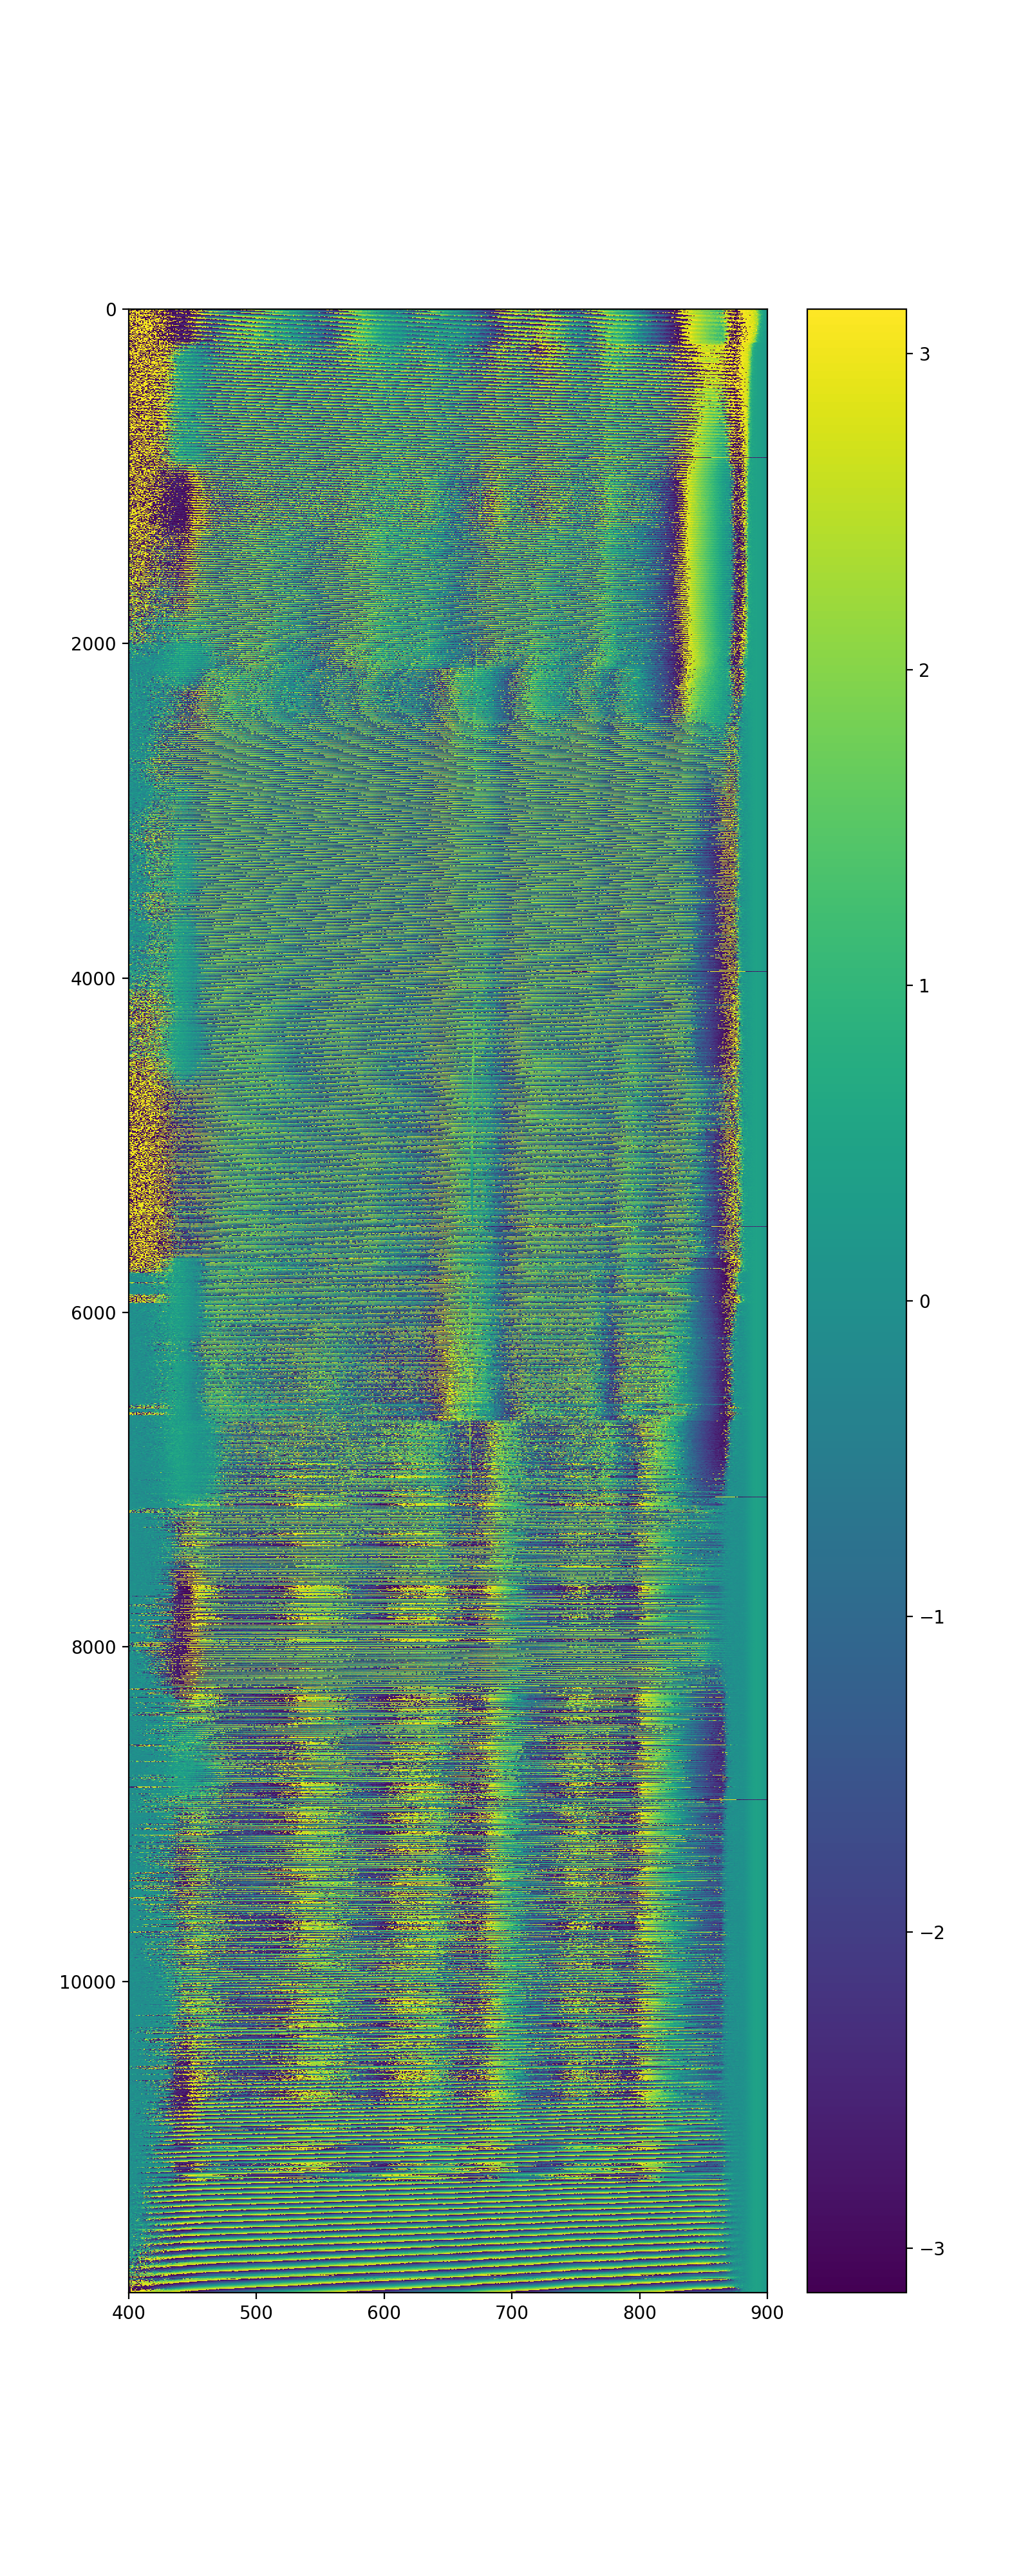

In [73]:
#fringe pattern in 2D from the data
plt.figure(figsize=(8,20))
plt.imshow(np.angle(vis), interpolation='nearest', aspect='auto')
plt.xlim(400,900)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


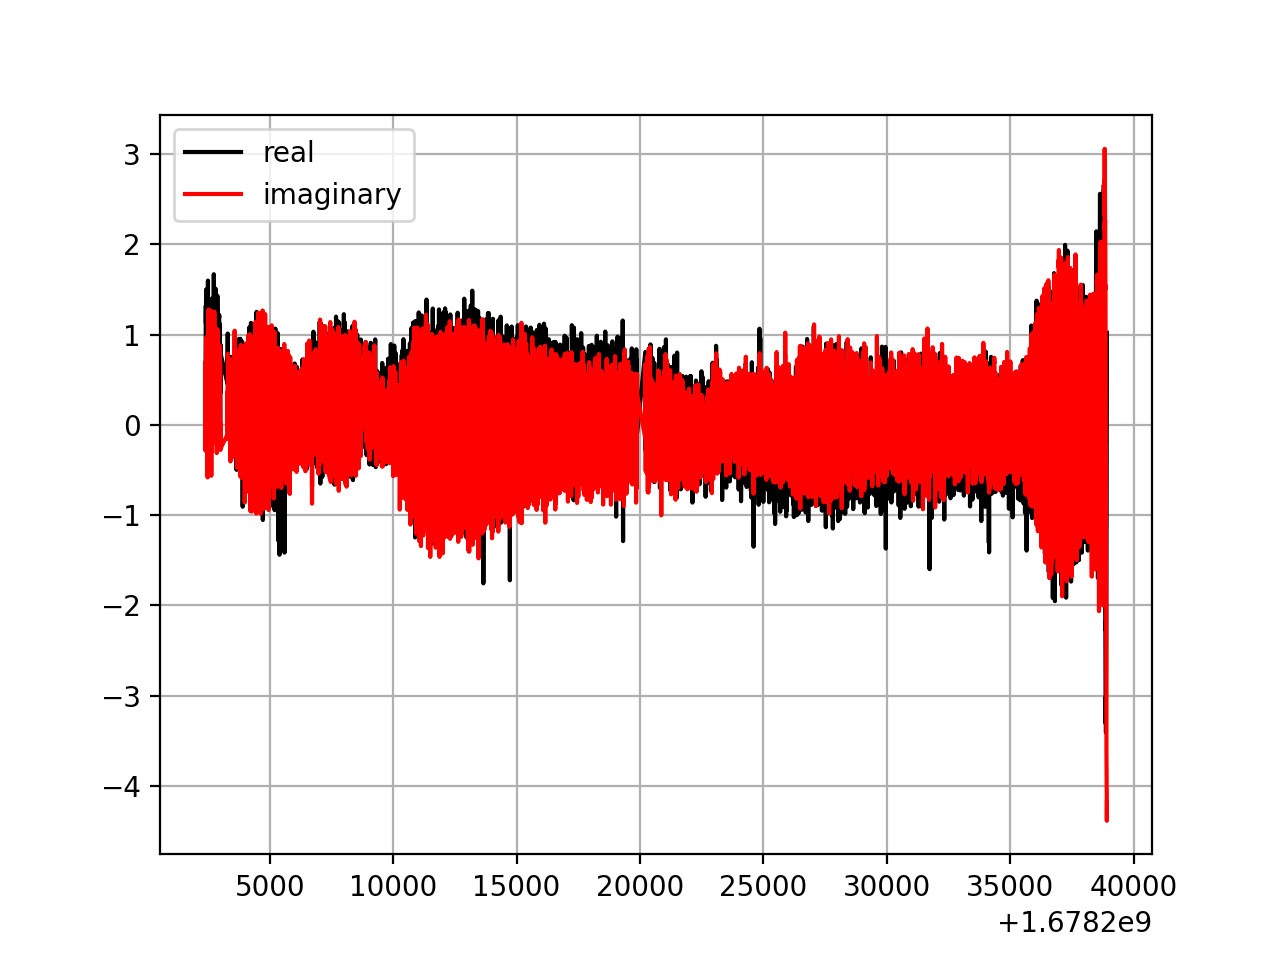

In [74]:
#one frequency band, tracking sun's fringe, pattern is the fringe
#i don't know why they're not symmetric on the ends
#is real one telescope and imaginary the other???? ask
plt.figure()
plt.plot(times, vis[:,600].real, color = 'black', label ='real')
plt.plot(times, vis[:,600].imag, color ='r', label ='imaginary')
plt.legend()
plt.grid()
plt.show()
# plt.xlim(20000e9,25000e9)

<IPython.core.display.Javascript object>


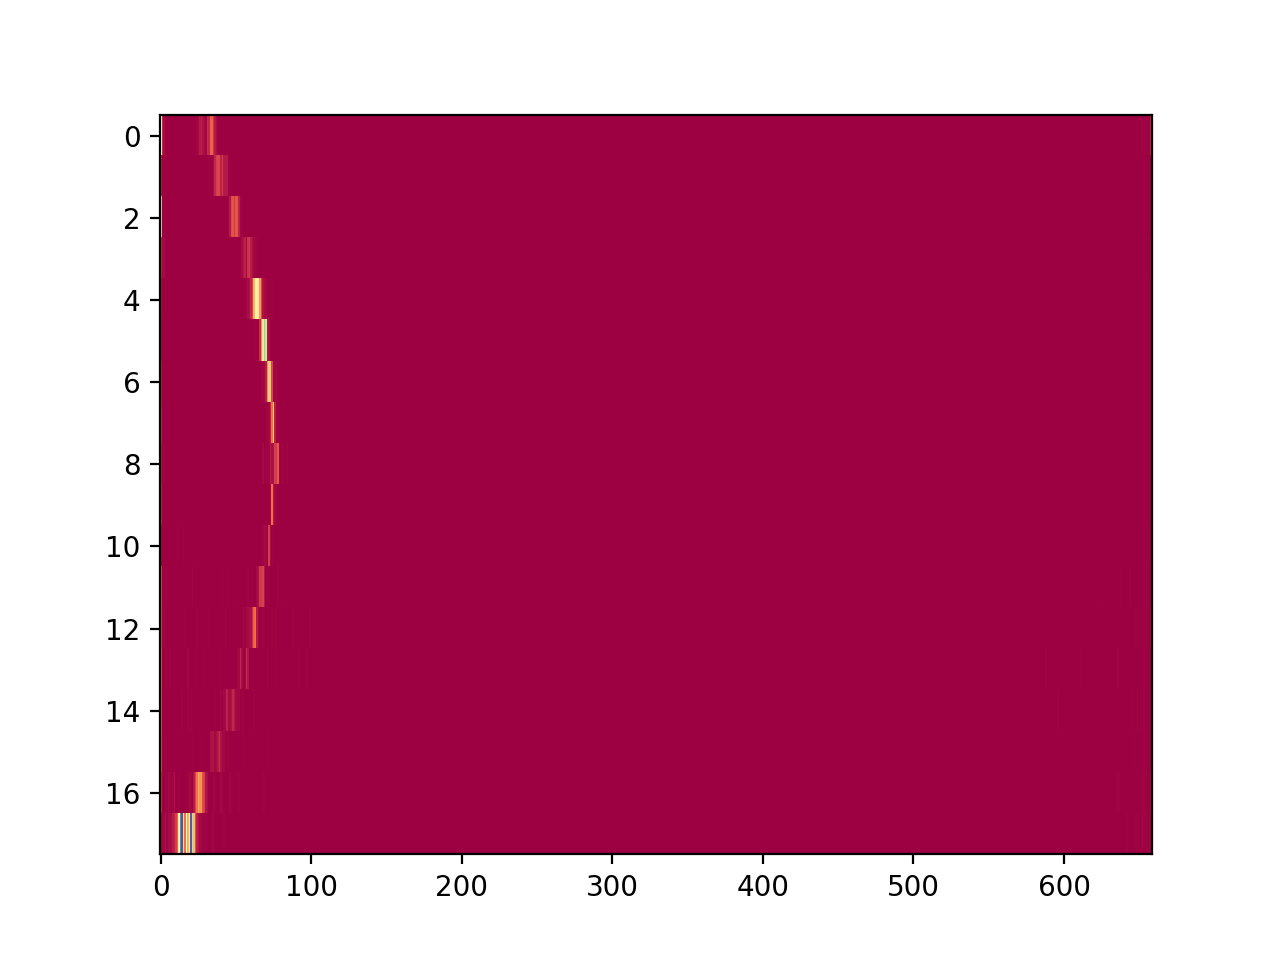

[ 0 39  0 59 63 69 72 75 78 74 72  0 63  0  0  0 25 14]


In [107]:
v = vis[:,600]
fq = freqs[600]
v.shape
Nsamples = 659
v.shape = (-1, Nsamples)
fringe_fq = np.fft.fft(v, axis=1)
#why does he do fringe squared if the thing does power already
plt.figure()
plt.imshow(np.abs(fringe_fq)**2, interpolation='nearest', aspect='auto', cmap='Spectral')
plt.show()
maxfreqindex = np.argmax(np.abs(fringe_fq)**2,axis = 1)
print(maxfreqindex)
# maxfreqindex[0] = 39
# maxfreqindex[2] = 59
# maxfreqindex[11] = 71
# maxfreqindex[13] = 62
# maxfreqindex[14] = 30
# maxfreqindex[15] = 27


In [25]:
C * (freqs[1] - freqs[0]) / freqs[0]

7094.076469873664

In [77]:
jds_data = ugradio.timing.julian_date(times)
lst0 = ugradio.timing.lst(jds_data[0])
lst1 = ugradio.timing.lst(jds_data[1])
lsts = lst0 + np.arange(jds_data.shape[0]) * (lst1 - lst0)
ones = np.ones_like(lsts)
ha = lsts - radec[0]
rot_eq_ha = np.array([[
    [np.cos(lsts),  np.sin(lsts),     0*ones],
    [np.sin(lsts), -np.cos(lsts),     0*ones],
    [      0*ones,        0*ones,     1*ones],
]])
lat = np.deg2rad(ugradio.nch.lat)
rot_ha_altaz = np.array([[
    [-np.sin(lat),  0, np.cos(lat)],
    [           0, -1,           0],
    [ np.cos(lat),  0, np.sin(lat)],
]])

rot_full = np.dot(rot_ha_altaz, rot_eq_ha)
rot_full.shape = (3, 3, -1)

In [27]:
sun_radec = ugradio.coord.sunpos(jds_data[0])
radec = (np.deg2rad(sun_radec[0]), np.deg2rad(sun_radec[1]))
theta = np.pi/2 - radec[1]
phi = radec[0]
sun_z = np.cos(theta)
r_xy = np.sin(theta)
sun_x = r_xy * np.cos(phi)
sun_y = r_xy * np.sin(phi)
sun_pos_eq = np.array([sun_x, sun_y, sun_z])
sun_pos_top = np.dot(sun_pos_eq, rot_full)
print(sun_pos_top.shape)
sun_pos_top = np.array([sun_pos_top[1], sun_pos_top[0], sun_pos_top[2]])
sun_pos_top.shape

(3, 11862)


(3, 11862)

In [28]:
baseline = np.array([20., 2, 0])
b_proj = np.dot(baseline, sun_pos_top)
lam = C / fq
w = b_proj / lam
fringe = np.exp(-2*np.pi*1j*w)
fringe = np.where(sun_pos_top[2] > 0, fringe, 0)
print(w.shape)

(11862,)


# 9.3

aaaa 3.0714373921344063
-0.09188338828769473
[-1.23153973 -1.08418528 -0.93683083 -0.78947638 -0.64212192 -0.49476747
 -0.34741302 -0.20005857 -0.05270412  0.09465034  0.24200479  0.38935924
  0.53671369  0.68406814  0.8314226   0.97877705  1.1261315   1.27348595]
[0.         0.01926804 0.         0.02914909 0.03112529 0.03408961
 0.03557177 0.03705392 0.03853608 0.03655987 0.03557177 0.
 0.03112529 0.         0.         0.         0.01235131 0.00691673]


<IPython.core.display.Javascript object>


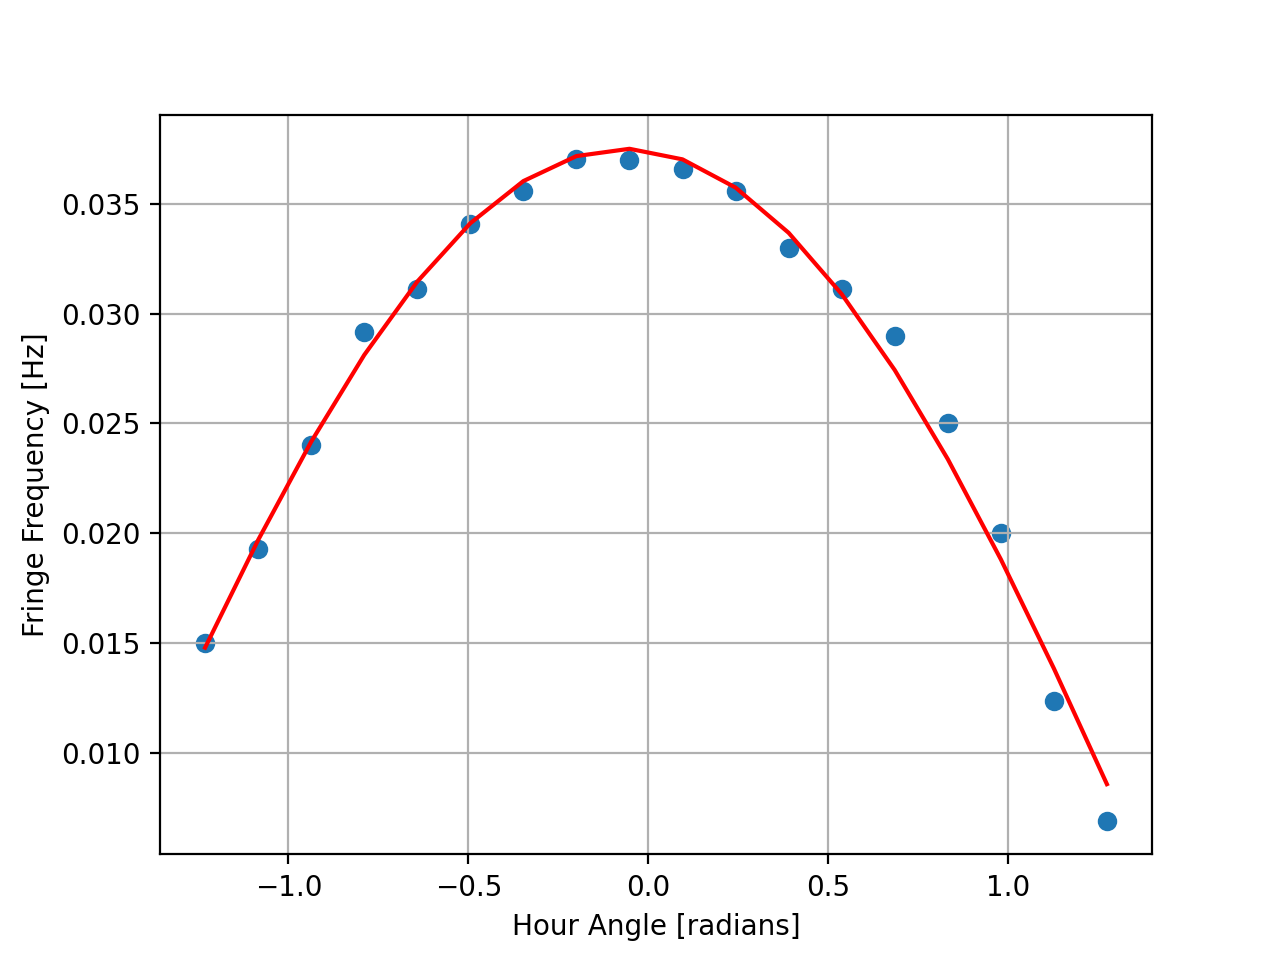

[0.00093939 0.00010171]


In [193]:
freqfft = np.fft.fftfreq(Nsamples, diffjds_seconds)
fringefreqs = freqfft[maxfreqindex]

print("aaaa", diffjds_seconds)
# Average the hour angles
sectionedhas = np.reshape(ha, (-1,Nsamples))
meanhas = np.mean(sectionedhas, axis = 1)

# Average the decs
sectioneddecs = np.reshape(decs, (-1,Nsamples))
meandecs = np.mean(sectioneddecs, axis = 1)

maxfringefreq = fringefreqs[np.argmax(fringefreqs)]
meridiandec = meandecs[np.argmax(fringefreqs)]
print(meridiandec)

print(meanhas)
print(fringefreqs)
fringefreqs[0] = 0.015
fringefreqs[2] = 0.024
fringefreqs[8] = 0.037
fringefreqs[11] = 0.033
fringefreqs[13] = 0.029
fringefreqs[14] = 0.025
fringefreqs[15] = 0.020

plt.figure()
plt.grid()
plt.scatter(np.unwrap(meanhas),fringefreqs)
plt.ylabel('Fringe Frequency [Hz]')
plt.xlabel('Hour Angle [radians]')
plt.show()

def ff(ha, bew, bns):
    return (bew*np.cos(meandecs)*np.cos(ha)/lamb) - (bns*np.sin(L)*np.cos(meandecs)*np.sin(ha)/lamb)

popt, pcov = curve_fit(ff, np.unwrap(meanhas), fringefreqs, p0 = [20, 0])
print(popt)


yfit = ff(np.unwrap(meanhas), *popt)
plt.plot(np.unwrap(meanhas), yfit, color = "red")

In [180]:
omega_earth = 2 * np.pi / 86164
def ff(ha, bew, bns):
    return (bew*np.cos(meandecs)*np.cos(ha)/lamb) - (bns*np.sin(L)*np.cos(meandecs)*np.sin(ha)/lamb)

popt, pcov = curve_fit(ff, np.unwrap(meanhas), fringefreqs, p0 = [20, 0])
print(popt/omega_earth)


yfit = ff(np.unwrap(meanhas), *popt)
plt.plot(np.unwrap(meanhas), yfit, color = "red")

# bew = 12.88222443
# bns = 1.39485794
print('baseline:',np.sqrt(12.88222443)**2 + (1.39485794)**2)


[12.88222443  1.39485794]
baseline: 14.827853102781047


In [191]:
#starting the radius of the sun
bew = 12.88222443
u_max = bew/lamb
u = u_max *np.cos(ha)
print(u_max)
print(u)

515.2889772
[135.3026472  135.41382111 135.52498824 ... 114.55843212 114.44609253
 114.33374723]


# 9.4

[-0.0343439  -0.09298904]


<IPython.core.display.Javascript object>


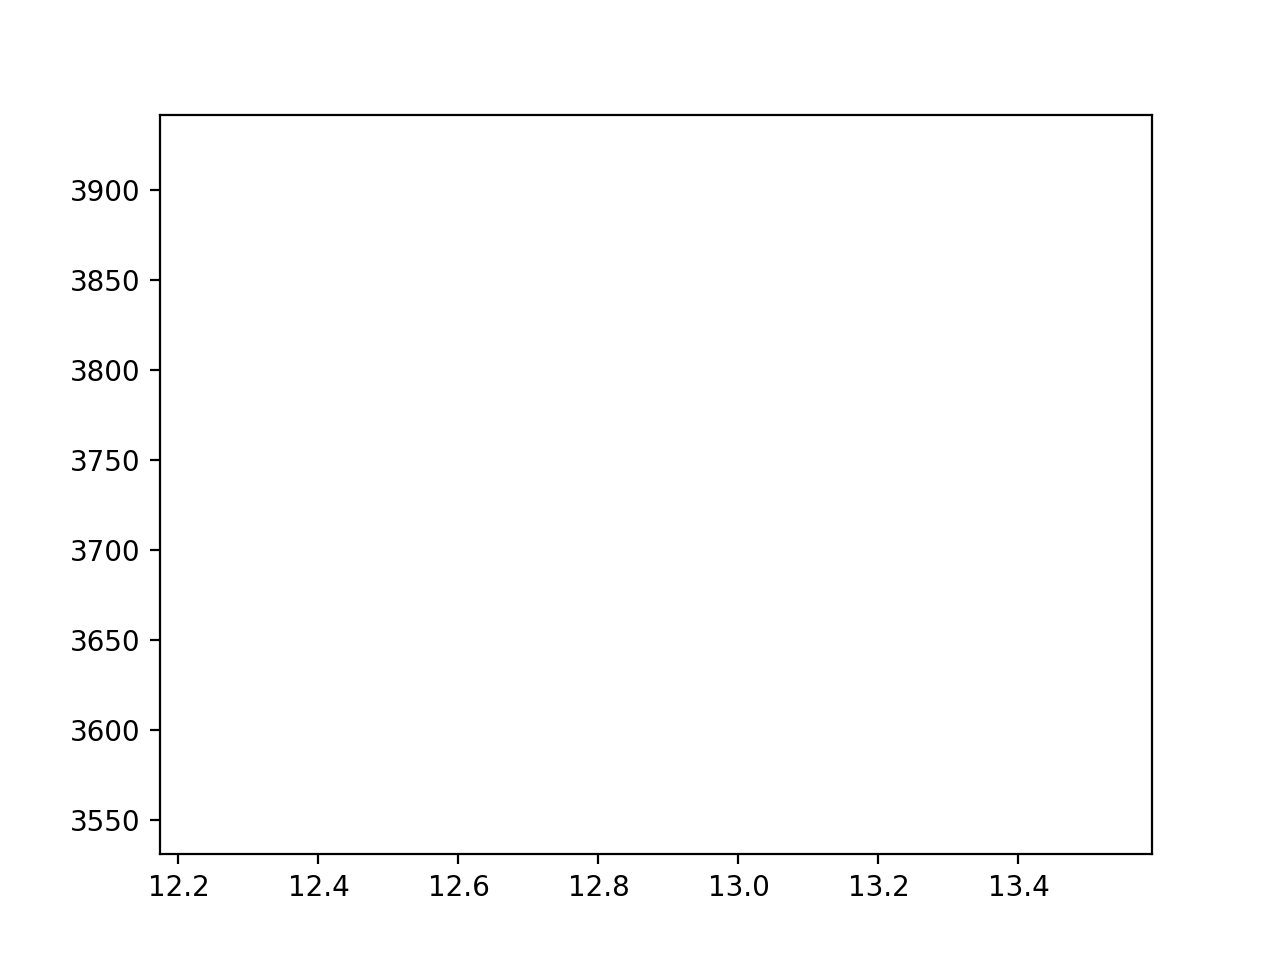

In [192]:
bews = [12.88222443]
bns = 1.39485794

def FA(nutg, a, b):
    return a*np.cos(2*np.pi*nutg) + b*np.sin(2*np.pi*nutg)

squaredress = []

for bew in bews:
    Qew = bew*np.cos(decs)/lamb
    Qns = bns*np.sin(L)*np.cos(decs)/lamb
    nutg = Qew*np.sin(has) + Qns*np.cos(has)
    nutg = nutg[:]
    
    # Now fit the curve
    popt, pcov = curve_fit(FA, nutg, vis[:,600].real, p0 = [0.0003, 0.0003])
    print(popt)
    yfit = FA(nutg, *popt)
    squaredres = np.sum((yfit - vis[:,600].real)**2)
    squaredress.append(squaredres)
    plt.plot(yfit)
plt.plot(vis[:,600].real)

plt.figure()
plt.plot(bews,squaredress)
plt.show()